# Diffusion Models

Implement a Score matching generative model in JAX to emulate posterior distribtions. Package name is fusions for diffusion meets ns (primarily constricted by what is available on pypi)

In [1]:
from fusions import DiffusionModel
import numpy as np
import matplotlib.pyplot as plt

Package wraps up everything in a class, designed to wrap around anesthetic (although currently just taking numpy arrays)

In [2]:
model = DiffusionModel()

## Posterior to emulate

Emulate a Gaussian Mixture model with a uniform prior 

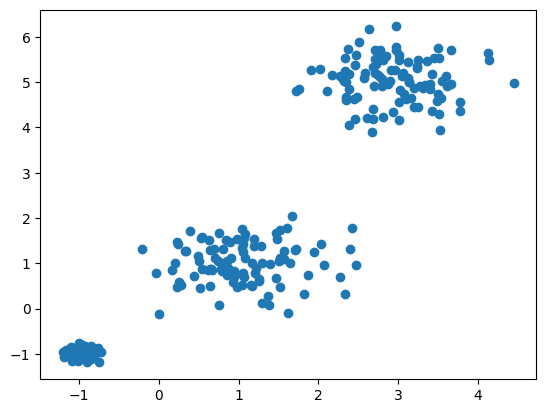

In [3]:
data_1=np.random.normal(1,.5,(100,2))
data_3=np.random.normal([3,5],.5,(100,2))
data_2=np.random.normal(-1,.1,(100,2))
data=np.concatenate([data_1,data_2])
plt.scatter(data[:,0],data[:,1])

## Train the model and use it to make predictions

In [4]:
model.train(data, n_epochs=2000)

100%|██████████| 2000/2000 [00:12<00:00, 166.28it/s, loss=0.5762838] 


Currently we are defining zero time in our diffusion process to be a gaussian prior, in theory we should be able to furnish the training process with any generative prior we like

In [5]:
x0 = np.random.normal(0, 1, (200, model.ndims))
x1,x1_t= model.predict(x0)

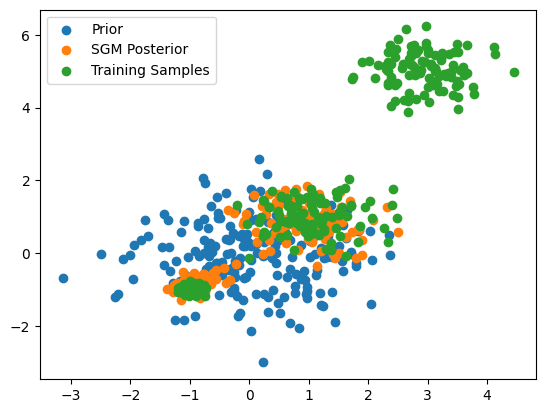

In [6]:
plt.scatter(x0[:,0],x0[:,1],label="Prior")
plt.scatter(x1[:,0],x1[:,1],label="SGM Posterior")
plt.scatter(data[:,0],data[:,1],label="Training Samples")
plt.legend()

Accuracy needs adjusting and plenty to play around with in terms of beta schedule etc. We can do cool things like plot trajectories of prior samples as a function of time as we diffuse them

Text(0.5, 0, 't')

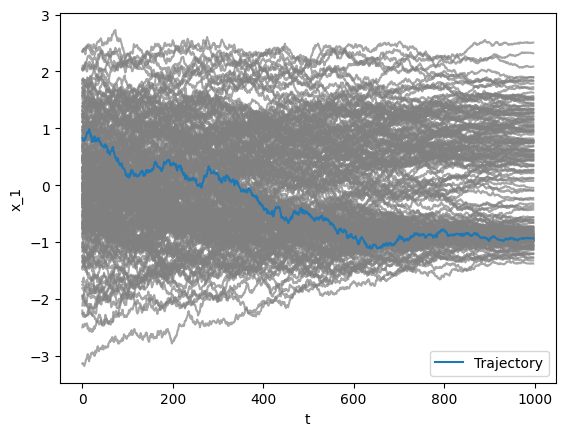

In [7]:
plt.plot(x1_t[...,:200,0],color="grey",alpha=.7)
plt.plot(x1_t[...,200,1],color="C0",label="Trajectory")
plt.legend()
plt.ylabel("x_1")
plt.xlabel("t")